In [1]:
!pip install segyio 


     -------------------------------------- 85.2/85.2 kB 535.7 kB/s eta 0:00:00


# importing library

In [3]:
import segyio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from shutil import copyfile 
from skimage import exposure 

In [5]:
file="C:/Users/KIIT/OneDrive/Desktop/Seismic_data.sgy"


# loading seismic data as cube 

In [8]:
seismic_data = segyio.tools.cube("C:/Users/KIIT/OneDrive/Desktop/Seismic_data.sgy")

ValueError: Invalid dimensions, ilines (631) * xlines (951) * offsets (1) should match the number of traces (600515)

# displaying seismic data 


NameError: name 'seismic_data' is not defined

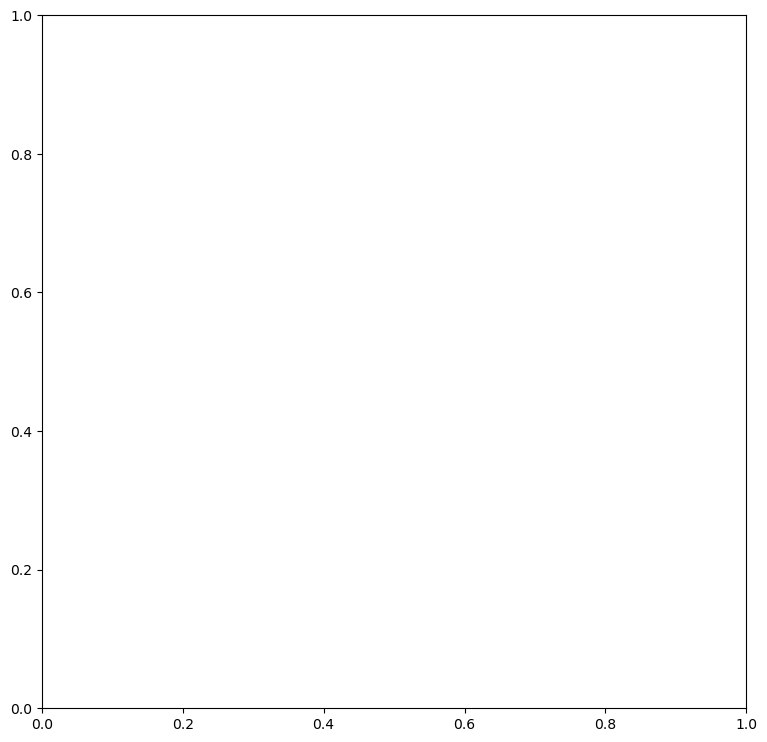

In [7]:
fig = plt.figure(figsize=(20,9))
ax=fig.add_subplot(121)
sim=ax.imshow(seismic_data[:,150,:],cmap='gray_r');
fig.colorbar(sim,ax=ax)
axx.set_xticks([])
axx.set_yticks([])
ax.invert_xaxis()

# laoding data using segysak

In [15]:
pip install segysak

Note: you may need to restart the kernel to use updated packages.


In [17]:
from segysak.segy import segy_loader

In [11]:
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [12]:
segy_file = pathlib.Path("C:/Users/KIIT/OneDrive/Desktop/Seismic_data.sgy")
print("SEG-Y exists:", segy_file.exists())

SEG-Y exists: True


In [18]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead


In [26]:

get_segy_texthead(segy_file)

Text HeaderC01  Created by:  (Tue Apr 07 16:03:31 2009)
C02  F3 Demo
C03
C04
C05  Byte positions (in addition to REV. 1 standard positions):
C06  X-coordinate: 73
C07  Y-coordinate: 77
C08  In-line:      9 (4-byte int)
C09  X-line:       21 (4-byte int)
C10
C11
C12  100/300 = (605835.5,6073556.5)
C13  100/1250 = (629576.25,6074220)
C14  750/300 = (605381.8125,6089799.5)
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36  I/X bytes: 9 / 21
C37  First sample time (ms): 4
C38
C39  SEG Y REV1
C40  END TEXTUAL HEADER

In [27]:
scan = segy_header_scan(segy_file, max_traces_scan=2000)
scan


  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,455.1015,283.248107,1.0,201.75,451.5,701.25,951.0
TRACE_SEQUENCE_FILE,5,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
FieldRecord,9,2000.0,100.5735,0.585465,100.0,100.00,101.0,101.00,102.0
TraceNumber,13,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,2000.0,754.1015,283.248107,300.0,500.75,750.5,1000.25,1250.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,2000.0,0.0000,0.000000,0.0,0.00,0.0,0.00,0.0


In [28]:
with pd.option_context("display.max_rows", 100):
    display(scan)
    

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,4.551015e+02,283.248107,1.0,201.75,451.5,701.25,951.0
TRACE_SEQUENCE_FILE,5,2000.0,1.000500e+03,577.494589,1.0,500.75,1000.5,1500.25,2000.0
FieldRecord,9,2000.0,1.005735e+02,0.585465,100.0,100.00,101.0,101.00,102.0
TraceNumber,13,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,2000.0,7.541015e+02,283.248107,300.0,500.75,750.5,1000.25,1250.0
CDP,21,2000.0,7.541015e+02,283.248107,300.0,500.75,750.5,1000.25,1250.0
CDP_TRACE,25,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
NSummedTraces,31,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
NStackedTraces,33,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


In [29]:
from segysak.segy import segy_loader
help(segy_loader)

Help on function segy_loader in module segysak.segy._segy_loader:

segy_loader(segyfile, cdp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cdp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, head_df=None, **segyio_kwargs)
    Load SEG-Y file into xarray.Dataset
    
    The output dataset has the following structure
        Dimensions:
            cdp/iline - CDP or Inline axis
            xline - Xline axis
            twt/depth - The vertical axis
            offset - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cdp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            ns - number of samples vertical
            sample_rate - sample rate in ms/m
            test - text h

In [ ]:
# loading with default byte locations
seisnc_vol = segy_loader(segy_file)

  0%|          | 0.00/601k [00:00<?, ? traces/s]

                     byte_loc     count          mean            std  \
TRACE_SEQUENCE_LINE         1  600515.0  4.670424e+02     273.254650   
TRACE_SEQUENCE_FILE         5  600515.0  3.002580e+05  173353.892789   
FieldRecord                 9  600515.0  4.156942e+02     183.081383   
EnergySourcePoint          17  600515.0  7.837837e+02     273.167295   
CDP                        21  600515.0  7.837837e+02     273.167295   
SourceX                    73  600515.0  6.177050e+06   68207.515200   
SourceY                    77  600515.0  6.081783e+07   45894.903658   
CDP_X                     181  600515.0  6.177050e+06   68207.515200   
CDP_Y                     185  600515.0  6.081783e+07   45894.903658   
INLINE_3D                 189  600515.0  4.156942e+02     183.081383   
CROSSLINE_3D              193  600515.0  7.837837e+02     273.167295   
ShotPoint                 197  600515.0  3.002580e+05  173353.892789   

                            min         25%         50%        

Converting SEGY:   0%|          | 0.00/601k [00:00<?, ? traces/s]